In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
# (a)

In [3]:
feat = np.random.multivariate_normal([0,0], [[1,0], [0,1]], 1000)

In [4]:
feat

array([[-0.0330394 ,  0.60874089],
       [-1.15072519,  0.49680865],
       [ 1.85589135,  0.59311587],
       ...,
       [-0.41665234, -0.12916116],
       [ 0.15416563,  0.80858608],
       [ 0.18513766,  0.56422485]])

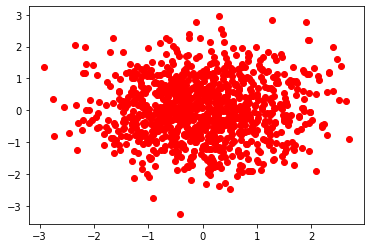

In [6]:
x, y = zip(*feat)
plt.plot(x, y, "ro")
plt.show()

In [7]:
#(b)

In [9]:
k_means = KMeans(n_clusters = 3)
k_means.fit(feat)
prediction = k_means.predict(feat)
centers = k_means.cluster_centers_

In [10]:
x, y = zip(*feat)

In [11]:
centers_x, centers_y = zip(*centers)

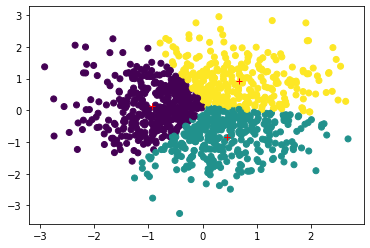

In [12]:
plt.scatter(x, y, c = prediction)
plt.plot(centers_x, centers_y, "r+")
plt.show()

In [15]:
#(c)

In [14]:
m_feat = np.copy(feat)
for i in range(len(prediction)):
    m_feat[i] = 0.99 * m_feat[i] + 0.01 * centers[prediction[i]]

In [17]:
k_means1 = KMeans(n_clusters = 3)
k_means1.fit(m_feat)
prediction1 = k_means1.predict(m_feat)
centers1 = k_means1.cluster_centers_

In [18]:
x1, y1 = zip(*m_feat)
centers_x1, centers_y1 = zip(*centers1)

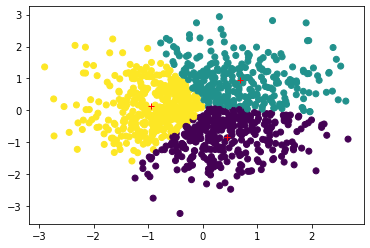

In [19]:
plt.scatter(x1, y1, c = prediction1)
plt.plot(centers_x1, centers_y1, "r+")
plt.show()

In [20]:
#(d)

In [33]:
#fits data into the n_cluster model and returns a tuple of 
#Kmeans model, numpy array of clusters for each data point, 
#and numpy array for cluster centers 

In [26]:
def fit_cluster(n, cloud):
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(cloud)
    return kmeans, kmeans.predict(cloud), kmeans.cluster_centers_ 

In [ ]:
#function that modifies data so that it represents passing of years 

In [34]:
def modify_feature(cloud, cluster, centers):
    m_cloud = np.copy(cloud)
    for i in range(len(cloud)):
        m_cloud[i] = 0.99 * m_cloud[i] + 0.01 * centers[cluster[i]]
    return m_cloud

In [35]:
m_feat1 = np.copy(m_feat)
for i in range(50):
    kmeans1, prediction1, centers1 = fit_cluster(3, m_feat1)
    m_feat1 = modify_feature(m_feat1, prediction1, centers1)

In [38]:
kmean_f, prediction_f, centers_f = fit_cluster(3, m_feat1)
x_f, y_f = zip(*m_feat1)
centers_x_f, centers_y_f = zip(*centers_f)

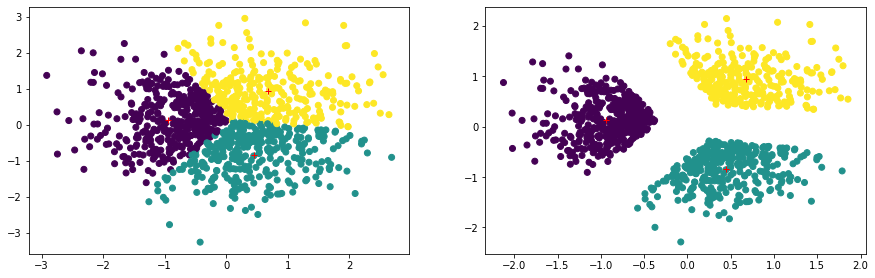

In [40]:
fig = plt.figure(figsize = (15, 10))
plt.subplot(221)
plt.scatter(x, y, c = prediction)
plt.plot(centers_x, centers_y, "r+")

plt.subplot(222)
plt.scatter(x_f, y_f, c = prediction_f)
plt.plot(centers_x_f, centers_y_f, "r+")
plt.show()

In [26]:
#Describe what has happened to your original population 
#of diverse individuals after a year (50 weeks).

In [ ]:
'''
We can observe that the members of the population clustered much 
closer around their respective centers after a year (50 weeks). The 
app which characterizes people's preferences actually rendered the 
population less diverse: an evidence of self-fulfilling prophecy. 
'''